### Evaluation of Clustering Methods 

- How will I evaluate? Doing lots of trials - how many? 

- Which datasets am I using? 

- What extra hybrid or modified approaches do I want to try? 

get cluster centers and assignments of variables to centers 

In [1]:
import numpy as np 

def min_squared_distance(centers: np.ndarray, point: np.ndarray):
    return np.min(np.sum((lambda c: (point - c)**2)(centers), axis=1))

def normalised_k_means_loss(centers: np.ndarray, datapoints: np.ndarray):
    # for each point, calculate the squared distance to all centers
    # take the minimum
    # average over all points 
    return np.mean(np.apply_along_axis(lambda row: min_squared_distance(centers, row), axis=1, arr=datapoints))

centers = np.array([[1,1], [2,2]])
points = np.array([[4, 1], [3,3], [0,1], [0,2]])
normalised_k_means_loss(centers, points)

np.float64(2.5)

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# create synthetic dataset in 2,3,10 dimensions with k=2,3,4,5,10
generator = np.random.default_rng(42)

for dimension in [2,3,10]:
    for num_centers in [2,3,4,5,10]:
        centers = generator.uniform(low=0, high=10, size=(num_centers, dimension))
        dataset = np.concat([generator.multivariate_normal(mean=c, cov=np.identity(dimension), size=100) for c in centers], axis=0)
        # normalise the data to [-1,1]
        scaler = MinMaxScaler((-1,1))
        normalised_dataset = scaler.fit_transform(dataset)
        np.save(f"datasets/d{dimension}{num_centers}.npy", normalised_dataset)

        

## DP Lloyd Method

          0       1
0 -0.093346 -0.4089
1  0.414933  0.3027


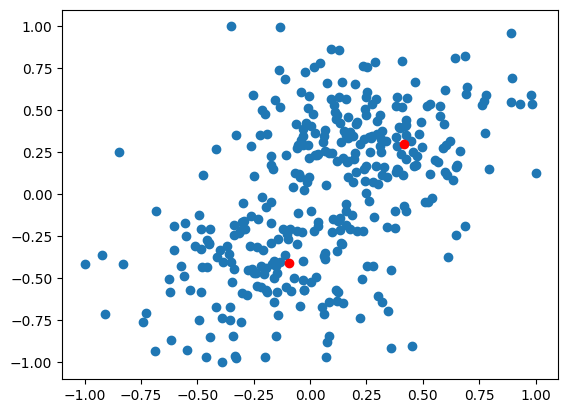

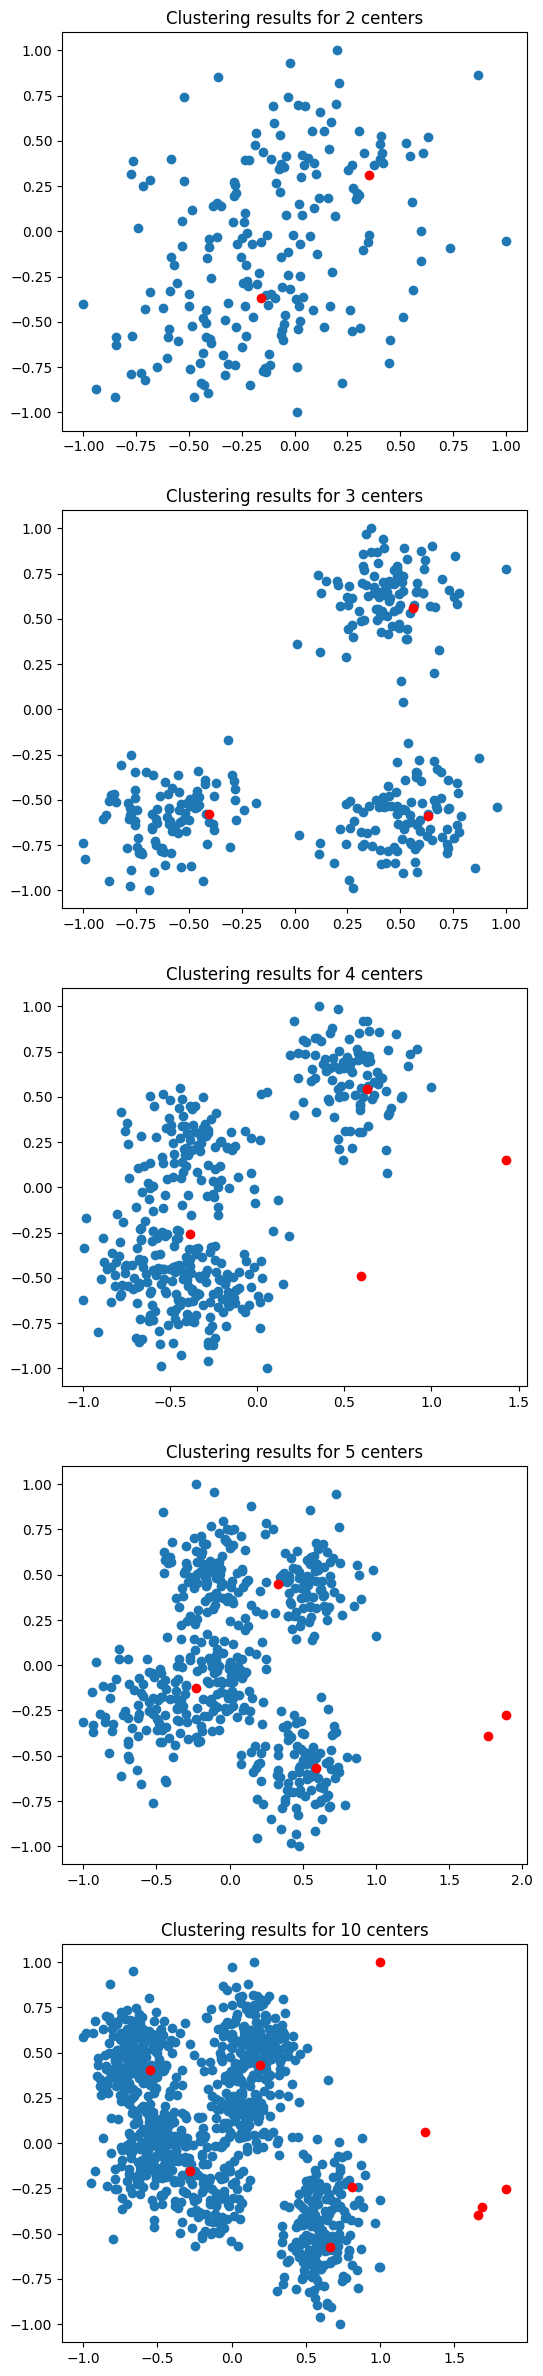

In [ ]:
from lloyd import PrivacyBudget, dplloyd
import pandas as pd
import matplotlib.pyplot as plt

priv = PrivacyBudget(5,None,method="uniform",total_iter=5)

fig, axes = plt.subplots(5, 1, figsize=(6, 30))

# 2 dimensions
table=[]
i=0
for num_centers in [2,3,4,5,10]:
    dataset = np.load(f"datasets/d2{num_centers}.npy")
    centers = S(num_centers, pd.DataFrame(dataset), 5, priv)
    axes[i].scatter(x=dataset[:,0], y=dataset[:, 1])
    axes[i].scatter(x=centers[0], y=centers[1], color="red")
    axes[i].set_title(f"Clustering results for {num_centers} centers")
    table.append(normalised_k_means_loss(centers, dataset))
    i += 1

#print(table)

## Grid Synopsis Method

      0    1     count
0  -0.9 -0.9  2.793879
1  -0.9 -0.7  0.869614
2  -0.9 -0.5  2.263001
3  -0.9 -0.3  1.502091
4  -0.9 -0.1 -1.669428
..  ...  ...       ...
95  0.9  0.1  0.301869
96  0.9  0.3 -0.323482
97  0.9  0.5 -1.741257
98  0.9  0.7 -1.443873
99  0.9  0.9  3.574333

[100 rows x 3 columns]
      0    1     count
0  -0.9 -0.9  2.793879
1  -0.9 -0.7  1.869614
2  -0.9 -0.5  6.263001
3  -0.9 -0.3  1.502091
4  -0.9 -0.1 -1.669428
..  ...  ...       ...
95  0.9  0.1  0.301869
96  0.9  0.3 -0.323482
97  0.9  0.5 -1.741257
98  0.9  0.7 -0.443873
99  0.9  0.9  2.574333

[100 rows x 3 columns]
      0    1     count
0  -0.9 -0.9  1.793879
1  -0.9 -0.7  1.869614
2  -0.9 -0.5  8.263001
3  -0.9 -0.3  3.502091
4  -0.9 -0.1  0.330572
..  ...  ...       ...
95  0.9  0.1  0.301869
96  0.9  0.3 -0.323482
97  0.9  0.5  1.258743
98  0.9  0.7  1.556127
99  0.9  0.9  2.574333

[100 rows x 3 columns]
      0    1     count
0  -0.9 -0.9  0.793879
1  -0.9 -0.7 -0.130386
2  -0.9 -0.5  2.263001
3  -0.9 

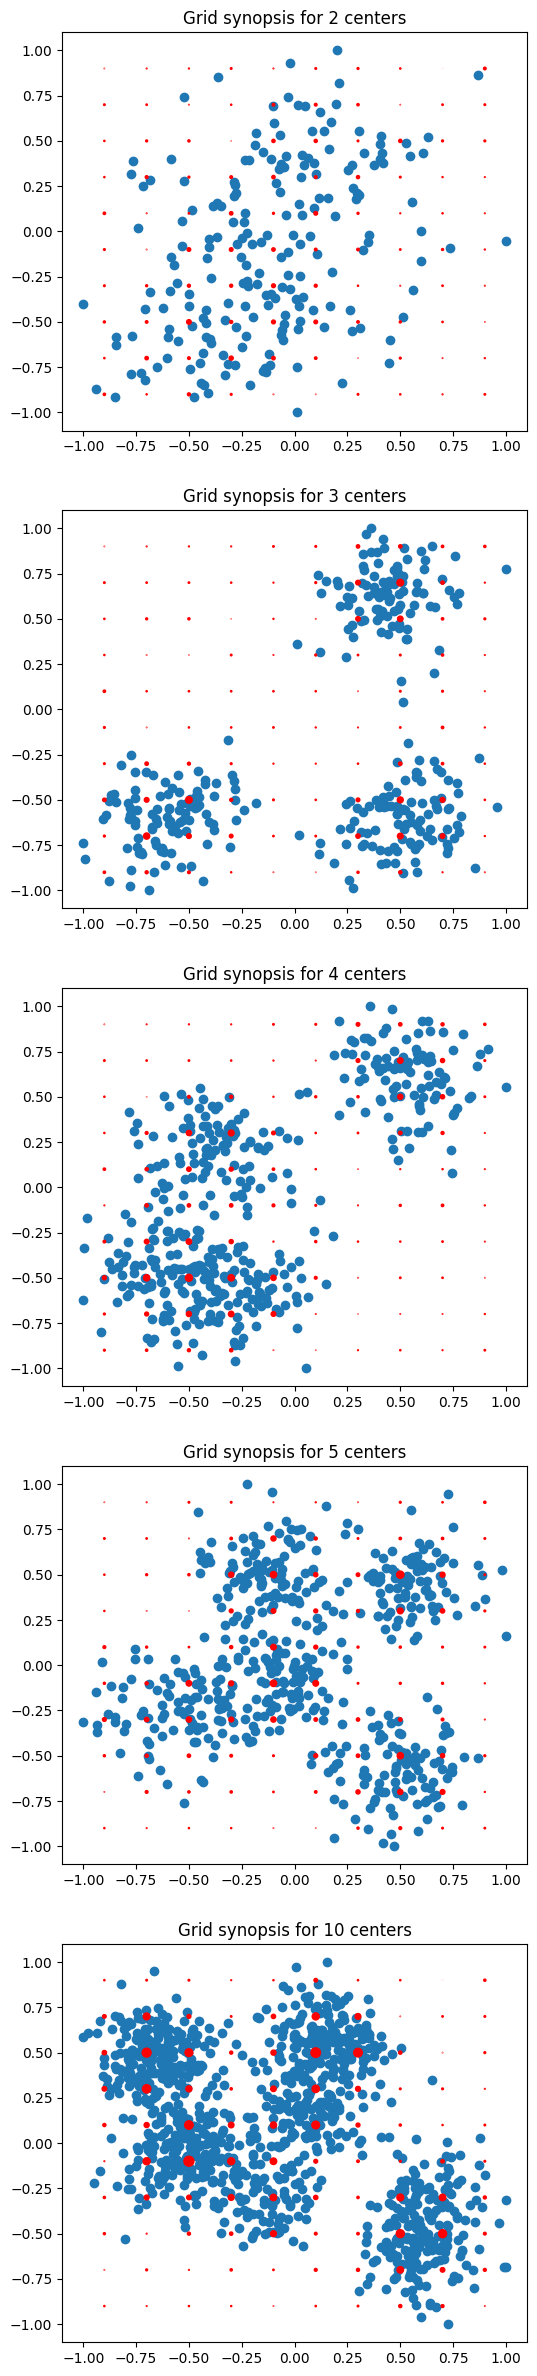

In [11]:
from grid import create_grid_synopsis

fig, axes = plt.subplots(5, 1, figsize=(6, 30))

# 2 dimensions
table=[]
i=0
for num_centers in [2,3,4,5,10]:
    dataset = np.load(f"datasets/d2{num_centers}.npy")
    weighted_points = create_grid_synopsis(pd.DataFrame(dataset), 1, 2, 10)
    axes[i].scatter(x=dataset[:,0], y=dataset[:, 1])
    print(weighted_points)
    axes[i].scatter(x=weighted_points[0], y=weighted_points[1], s=abs(weighted_points["count"]), color="red")
    axes[i].set_title(f"Grid synopsis for {num_centers} centers")
    i+=1


## Tree Based Synopsis Method

(300, 2)
Parameters used 
 max depth: 20
 branching threshold: 66 
 include_threshold: 22
Creating tree...
num leaves: 16
           0         1
0   1.428322  0.531222
1   1.243465 -0.752561
2   1.808375  0.032196
3   2.167618 -1.858045
4  -0.218656 -1.499197
5   1.886634  1.609425
6   2.015148 -0.663512
7   1.016642 -1.607617
8   1.642488 -2.135701
9   2.008311 -0.526269
10  1.223262 -0.296816
11  2.527952 -0.927289
12  0.861069 -0.413292
13 -0.935170 -1.295935
14  2.428788  1.211469
15  2.381545  0.074409
            0
0   29.839314
1   26.839314
2   23.839314
3   52.839314
4   52.839314
5   58.839314
6   24.839314
7   37.839314
8   51.839314
9   22.839314
10  24.839314
11  46.839314
12  27.839314
13  61.839314
14  58.839314
15  30.839314


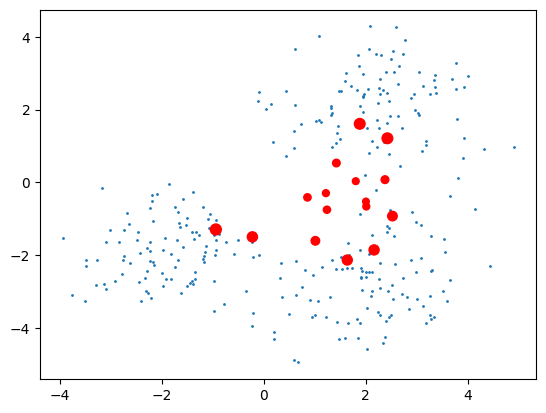

lalala 6.541237418181832 2
Parameters used 
 max depth: 20
 branching threshold: 24 
 include_threshold: 8
pcalc AveragePrivacyParam(gaussian_standard_deviation=6.541237418181832, sensitivity=2) CountPrivacyParam(dlaplace_param=0.015287627341279943)
Creating tree...
Printing entire non private tree...
level 0 [34]
level 1 [-41, -91]
Empty DataFrame
Columns: []
Index: [] Empty DataFrame
Columns: []
Index: []


KeyError: 0

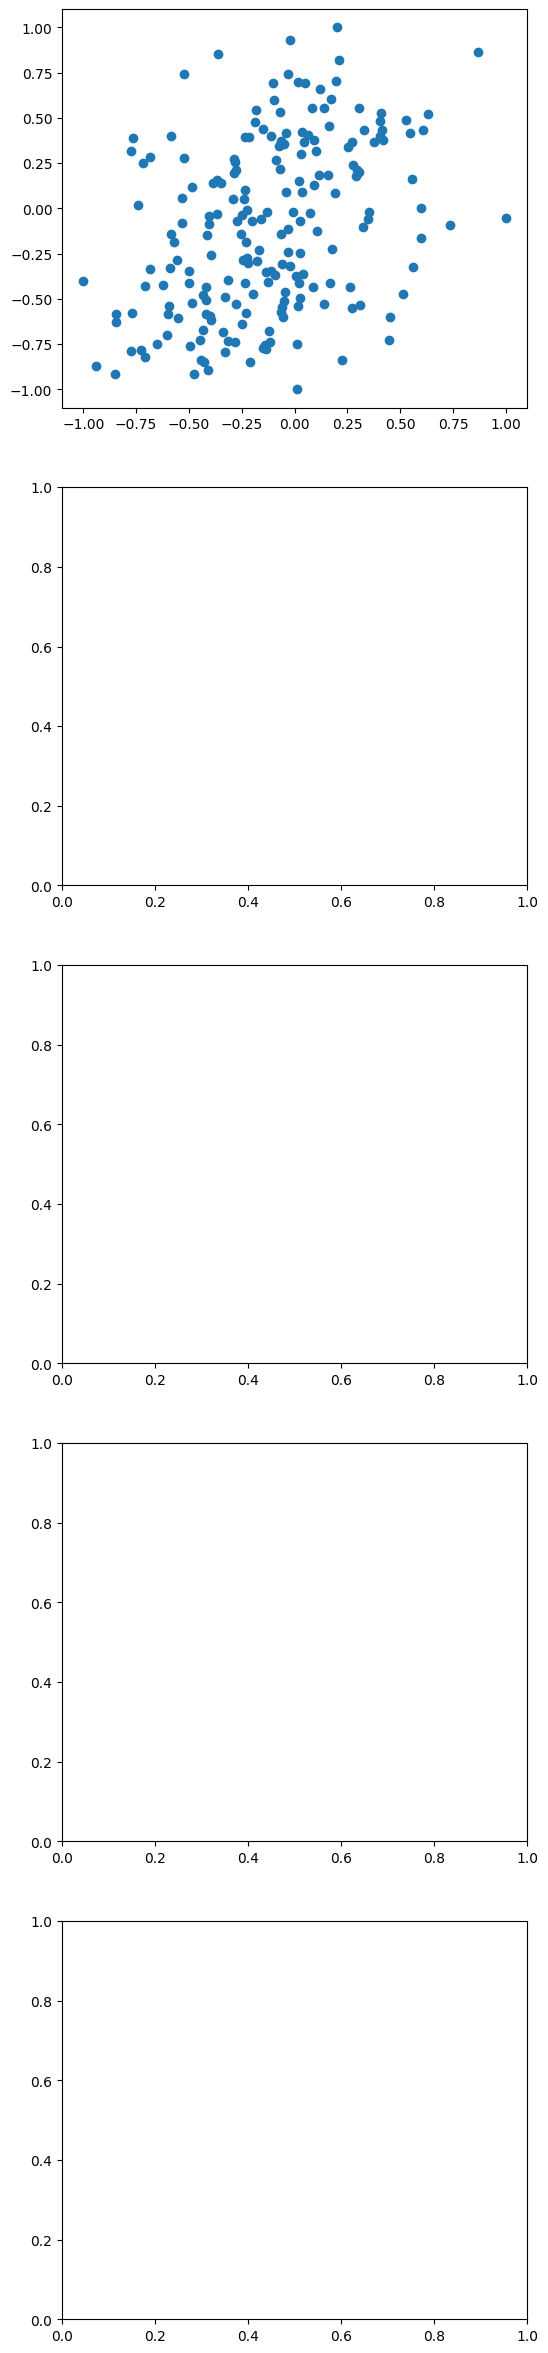

In [ ]:
from bucket import bucket_using_privacy_accountant, Params

# create_bucket_synopsis is my method using only laplace noise, bucket_using_privacy_accountant is using googles gaussian noise, discrete laplace noise and mechanism calibration 
fig, axes = plt.subplots(5, 1, figsize=(6, 30))

p = Params(epsilon=1, delta=0.0001, radius=2, dimension=2, k=2)
# 2 dimensions
table=[]
i=0
for num_centers in [2,3,4,5,10]:
    p.k = num_centers
    dataset = np.load(f"datasets/d2{num_centers}.npy")
    points, weights = bucket_using_privacy_accountant(pd.DataFrame(dataset), p)
    axes[i].scatter(x=dataset[:,0], y=dataset[:, 1])
    print(points, weights)
    axes[i].scatter(x=points[0], y=points[1], s=np.abs(weights), color="red")
    axes[i].set_title(f"Tree based synopsis for {num_centers} centers")
    i+=1